### Performing KNN using principal component analysis

### Importing the libraries required 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Readig the data

In [2]:
df = pd.read_csv("Iris.txt")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Shape of the data

In [4]:
df.shape

(150, 6)

### Information about the data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


### Converting caterogical data to numericals

In [7]:
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Describing the data

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking if any values are present in the given data

In [11]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Graph for visualization

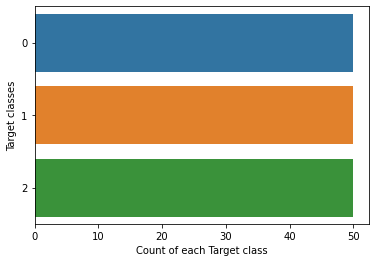

In [12]:
sns.countplot(y=df.Species ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

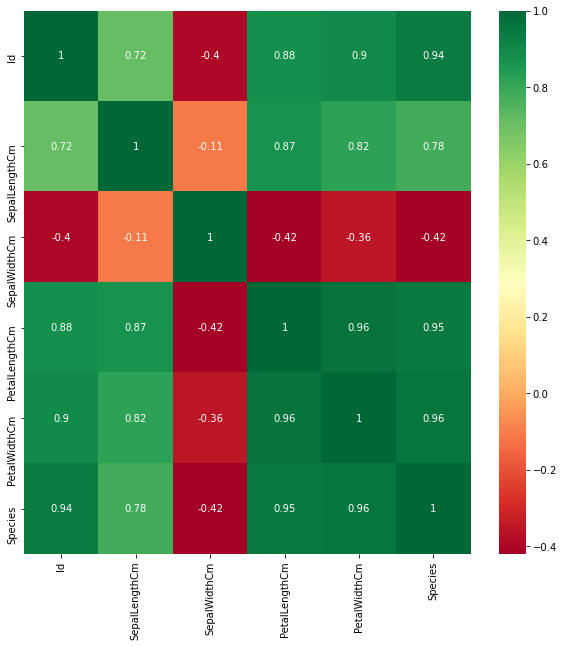

In [14]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

### Divide the data into feature(X) and target(Y) sets.

In [16]:
X= df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

### Importing the libraries required 

In [17]:
#importing the libraries required to perform KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [20]:
pca.get_covariance()

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ,  0.90579723],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.90579723,  0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [21]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

### Splitting the data

In [23]:
X_train_new, X_test_new, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=20)

In [27]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,Y_train)
print("Train score PCA",knn_pca.score(X_train_new,Y_train),"%")
print("Test score PCA",knn_pca.score(X_test_new,Y_test),"%")

Train score PCA 1.0 %
Test score PCA 0.9777777777777777 %
